In [2]:
from sklearn import datasets
iris=datasets.load_iris()
X_iris, y_iris=iris.data, iris.target
print (X_iris.shape,  y_iris.shape)
print (X_iris[0], y_iris[0])

(150, 4) (150,)
[5.1 3.5 1.4 0.2] 0


In [3]:
>>> from sklearn.model_selection import train_test_split
>>> from sklearn import preprocessing
>>> # Get dataset with only the first two attributes
>>> X, y = X_iris[:, :2], y_iris
>>> # Split the dataset into a training and a testing set
>>> # Test set will be the 25% taken randomly
>>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
>>> print (X_train.shape, y_train.shape)
>>> # Standardize the features
>>> scaler = preprocessing.StandardScaler().fit(X_train)
>>> X_train = scaler.transform(X_train)
>>> X_test = scaler.transform(X_test)

(112, 2) (112,)


In [4]:
>>> import matplotlib.pyplot as plt
>>> colors = ['red', 'greenyellow', 'blue']
>>> for i in range(len(colors)):
>>>     xs = X_train[:, 0][y_train == i]
>>>     ys = X_train[:, 1][y_train == i]
>>>     plt.scatter(xs, ys, c=colors[i])
>>> plt.legend(iris.target_names)
>>> plt.xlabel('Sepal length')
>>> plt.ylabel('Sepal width')

Text(0, 0.5, 'Sepal width')

In [5]:
>>> from sklearn.linear_model import SGDClassifier
>>> clf = SGDClassifier()
>>> clf.fit(X_train, y_train) 

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [6]:
>>> print (clf.coef_)
>>> print (clf.intercept_)

[[-30.37572095  12.43813157]
 [ -3.80125881  -4.39157065]
 [  6.00402144  -4.34612807]]
[-19.11883247  -5.95218217  -5.13406626]


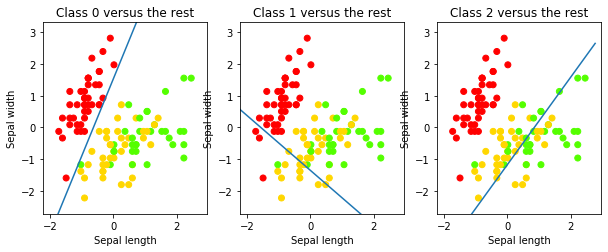

In [7]:
import numpy as np
import matplotlib
x_min = X_train[:, 0].min() - 0.5
x_max = X_train[:, 0].max() +  .5
y_min = X_train[:, 1].min() - 0.5
y_max = X_train[:, 1].max() +  .5
xs = np.arange(x_min, x_max, 0.5)
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(10, 6)
for i in [0, 1, 2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class '+ str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    plt.sca(axes[i])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
        cmap=plt.cm.prism)
    ys = (-clf.intercept_[i]-xs*clf.coef_[i, 0])/clf.coef_[i, 1]
    plt.plot(xs, ys)    

In [8]:
print (clf.predict(scaler.transform([[4.7, 3.1]])))

[0]


In [9]:
print (clf.decision_function(scaler.transform([[4.7, 3.1]])))

[[ 20.19029989  -1.53552426 -13.06333381]]


In [10]:
>>> from sklearn import metrics
>>> y_train_pred = clf.predict(X_train)
>>> print (metrics.accuracy_score(y_train, y_train_pred))

0.7857142857142857


In [11]:
>>> y_pred = clf.predict(X_test)
>>> print (metrics.accuracy_score(y_test, y_pred))


0.7631578947368421


In [12]:
print (metrics.classification_report(y_test, y_pred,target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.75      0.27      0.40        11
   virginica       0.69      0.95      0.80        19

    accuracy                           0.76        38
   macro avg       0.81      0.74      0.73        38
weighted avg       0.77      0.76      0.73        38



In [15]:
print (metrics.confusion_matrix(y_test, y_pred))

[[ 8  0  0]
 [ 0  3  8]
 [ 0  1 18]]


In [16]:
print("My name is Qiuchen LU")
print("My NetID is: QLU10")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Qiuchen LU
My NetID is: QLU10
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
